## Módulos

In [1]:
import fecon236 as fe
import pandas as pd
import numpy as np                               
import matplotlib.pyplot as plt

In [2]:
dir(fe)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'boltz',
 'boots',
 'boxplot',
 'bs',
 'cormatrix',
 'correlate',
 'cotr_get',
 'cotr_position',
 'cotr_position_bonds',
 'cotr_position_equities',
 'cotr_position_metals',
 'cotr_position_usd',
 'creditprof',
 'd4bei',
 'd4bills',
 'd4bond10',
 'd4brent',
 'd4curve',
 'd4defl',
 'd4eurjpy',
 'd4eurusd',
 'd4ff',
 'd4ff30',
 'd4gas',
 'd4libeur',
 'd4libjpy',
 'd4libusd',
 'd4oil',
 'd4spx',
 'd4tips10',
 'd4usdcny',
 'd4usdjpy',
 'd4vix',
 'd4wti',
 'd4xau',
 'd4xauusd',
 'd4zero10',
 'd7xbtcount',
 'd7xbtusd',
 'daily',
 'datetime',
 'detrend',
 'detrendnorm',
 'detrendpc',
 'df2a',
 'dif',
 'diflog',
 'div',
 'division',
 'dl_forex',
 'dl_long',
 'dl_short',
 'dlist',
 'dst',
 'econ',
 'f4bond10',
 'f4cad',
 'f4chf',
 'f4eur',
 'f4fed',
 'f4gbp',
 'f4jpy',
 'f4libor',
 'f4spes',
 'f4spx',
 'f4wti',
 'f4xag',
 'f4xau',
 'f

## Contexto del trabajo
Problema de forecasting de la fed funds rate en base a la información contenida en las tasas Libor. Para esto, utiliza la diferencia entre las tasas forward LIBOR, partiendo del siguiente supuesto:

$ (ffy - ff) \approx (ff\_1y\_forward - ff30) \approx (LIBOR\_1y\_forward - LIBOR\_day0) $

donde,  

$ff30$: EMA de 30-períodos de la Fed Funds Rate

Despejando $ffy$:

$ff\_1y\_forward \approx LIBOR\_1y\_forward - LIBOR\_day0 + ff30$

#### Marco conceptual:
- Tasa LIBOR: Es una tasa de referencia que denota el promedio de tasas a la cual los bancos se prestan dinero a corto plazo entre sí. Se publica en 7 vencimientos (desde un día hasta 12 meses) y en 5 divisas diferentes (dólar estadounidense, euro, libra, yen japonés y franco suizo).
- Tasa Fed Funds: Es la tasa de interés a la que los bancos comerciales prestan reservas entre sí sobre una base de la noche a la mañana. Está definida en dólares estadounidenses.

## Obtención de la data
Necesitaremos tres sets de información:
- Fed Funds Rate
- Tasas LIBOR

Utilizamos la función get() que está designada como una función get-type para utilizar los datos dentro del módulo. Devuelve un DataFrame de Pandas.

In [3]:
ffer = fe.get(fe.d4ff) # Daily Fed Funds, effective rate
type(ffer)

pandas.core.frame.DataFrame

## Análisis exploratorio del DataFrame
Lo primero a realizar cuando se está explorando la data es visualizarla a través de gráficos. Permiten detectar patrones y observaciones inusuales más fácilmente. El tipo de data determinará que tipo de gráfico es más apropiado.

C:\Users\FRANCISCODIEGOJurado\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


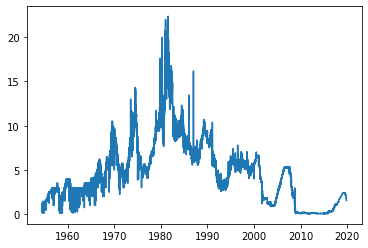

In [4]:
plt.plot(ffer)

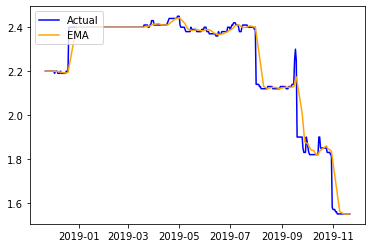

In [5]:
rolling_mean = ffer.Y.rolling(window=10).mean()

plt.plot(ffer.tail(365), label = 'Actual', color = 'blue')
plt.plot(rolling_mean.tail(365), label = 'EMA', color = 'orange')
plt.legend(loc='upper left')

La media móvil exponencial se utiliza para suavizar la serie original. Tener en cuenta que cuántas más ventanas, más suave será.

En general, puede observarse que la serie de tiempo tiene instancias de tendencias positivas y negativas, denotando alta volatilidad, y consecuentemente planteando la necesidad de transformar los datos para posteriormente poder utilizar distintas metodologías de predicción.

# Preprocesamiento
## Valores faltantes
Utilizamos el método `isnull()` para evaluar si hay valores faltantes. Una manera rápida de hacer esto es combinándolo con `.values.any()`, que devolverá un booleano: `True` (hay faltantes) o `False` (no los hay).

In [6]:
print('Booleano:', ffer.isnull().values.any())
print('Sumatoria de faltantes:', ffer.isnull().sum())

Booleano: False
Sumatoria de faltantes: Y    0
dtype: int64


## Continuación ...